<a href="https://colab.research.google.com/github/Kaggle-Competions-Aviv/Titanic/blob/main/titanic_kaggle_competions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Channalge

*Aviv Tabak*

---
#Introduction

This is an educational project from Kaggle competitions.
The details of the challange are explained here:[Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data?select=train.csv).

The solution process will be divided into several main steps:


1.   Fetching Train/Test data
2.   Proccess data - outlier, NaNs, etc.
3.   Exlore data - look for patterns, create new features, etc.
4.   Train model and predict
5.   Submmit output



#Import Project from Github

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Change it as you wish
%cd /content/drive/MyDrive/Github/

/content/drive/MyDrive/Github


In [ ]:
#If not exists, clone will pass without error, else it will failed with error
!git clone https://github.com/Kaggle-Competions-Aviv/Titanic.git

fatal: destination path 'Titanic' already exists and is not an empty directory.


In [3]:
%cd Titanic


/content/drive/MyDrive/Github/Titanic


In [ ]:
#Update main
!git pull origin main

From https://github.com/Kaggle-Competions-Aviv/Titanic
 * branch            main       -> FETCH_HEAD
Already up to date.


In [ ]:
#Merge main to current branch
!git merge main

Already up to date.


In [29]:
!git config --global user.email "avivtabak@gmail.com"
!git config --global user.name "avivtabak"

In [30]:
message = "introduction"
!git commit -m {message}

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [31]:
!git push

Everything up-to-date


In [4]:
!git status

On branch feature/parsing-csv
nothing to commit, working tree clean


In [26]:
#!git checkout main

Switched to branch 'main'
Your branch is up to date with 'origin/main'.


In [27]:
#!git push origin --delete feature/parsing-csv
#!git branch -d feature/parsing-csv

To https://github.com/Kaggle-Competions-Aviv/Titanic.git
 - [deleted]         feature/parsing-csv
Deleted branch feature/parsing-csv (was 529ff27).


#Imports

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

#Data

##Fetch Data from csv

In [8]:
train_dataset_df = pd.read_csv('train.csv',delimiter=',')
test_dataset_df =pd.read_csv('test.csv', delimiter=',')

##Inspect datasets

In [9]:
#Inspect datasets
print("Train set")
print(train_dataset_df.head())
print("Shape")
print(train_dataset_df.shape)

Train set
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [10]:
print("Test set")
print(test_dataset_df.head())
print("Shape")
print(test_dataset_df.shape)

Test set
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Shape
(418, 11)


##Clean Train Data

We won't use Name, Ticket, Cabin and embarked columns, as they probably have small effect on the target label Survived.
We also convert 'sex' column values to be scalar:
0 - woman
1 - man

In [11]:
train_dataset_df = train_dataset_df.drop(columns=['Ticket','Embarked','Name','Cabin'])


In [12]:
mapping = {'male': 1, 'female': 0}
train_dataset_df = train_dataset_df.replace({'Sex': mapping})
train_dataset_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


We see that Age contain NaN values which can really affect the result, and there are quite a lot from it, so lets drop this column (This is not always a good idea, but we will do it here)

In [13]:
train_dataset_df.isna().any()
print(train_dataset_df['Age'].isna().sum())

177


In [14]:
train_dataset_df = train_dataset_df.drop(columns=['Age'])

## Plot train data

In [15]:
train_dataset_df.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333
SibSp,-0.057527,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000


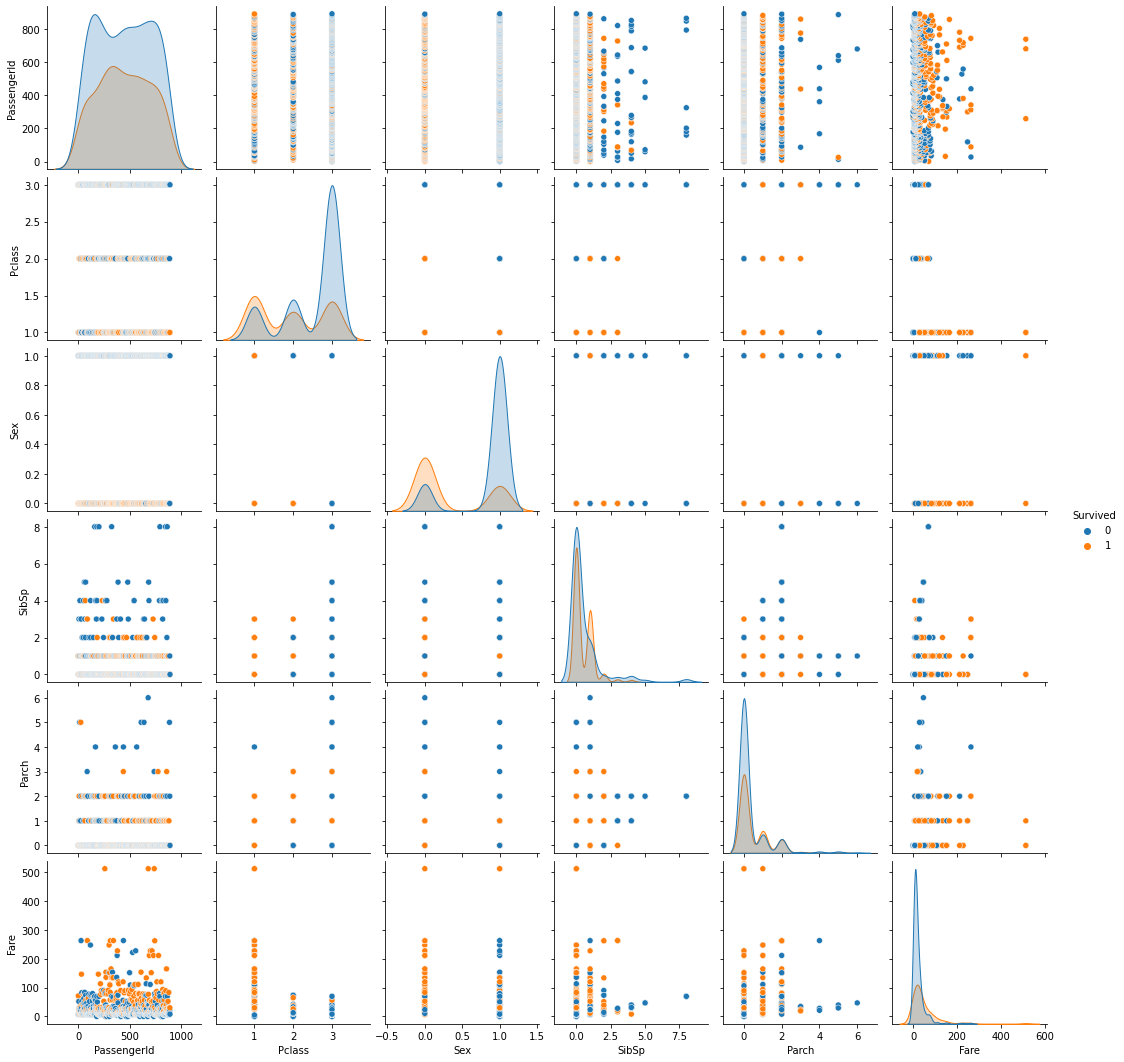

In [16]:
sns.pairplot(train_dataset_df, hue='Survived') 

#Train

In [18]:
features = ['Pclass', 'Sex','SibSp','Parch','Fare']
target = 'Survived'
X_train_df = train_dataset_df.loc[:,features]
y_train_df = train_dataset_df.loc[:,target]
X_test_df = test_dataset_df.loc[:,features]
X_train = X_train_df.to_numpy()
y_train = y_train_df.to_numpy()
X_test = X_test_df.to_numpy()

##RandomForest

In [20]:
random_forest_classifier = RandomForestClassifier(n_estimators=10)
random_forest_classifier_score = cross_val_score(random_forest_classifier,X_train,y_train,cv=5)
print("random_forest_classifier: %0.2f accuracy with a standard deviation of %0.2f" % (random_forest_classifier_score.mean(), random_forest_classifier_score.std()))

random_forest_classifier: 0.81 accuracy with a standard deviation of 0.03


In [21]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
extra_trees_classifier_score = cross_val_score(extra_trees_classifier,X_train,y_train,cv=5)
print("random_forest_classifier_score: %0.2f accuracy with a standard deviation of %0.2f" % (extra_trees_classifier_score.mean(), extra_trees_classifier_score.std()))

random_forest_classifier_score: 0.81 accuracy with a standard deviation of 0.03


##SVM

We will use SVM to learn a binary classifier of class Survived: 0 = No, 1 = Yes

In [22]:
#From docs: https://scikit-learn.org/stable/modules/svm.html
#Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data.
#For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1.
#Note that the same scaling must be applied to the test vector to obtain meaningful results.
#This can be done easily by using a Pipeline
C = 1.0  # SVM regularization parameter
svc = make_pipeline(StandardScaler(),svm.SVC(kernel='linear', C=C))
svc_scores = cross_val_score(svc,X_train,y_train,cv=5)
print("svc: %0.2f accuracy with a standard deviation of %0.2f" % (svc_scores.mean(), svc_scores.std()))

svc: 0.79 accuracy with a standard deviation of 0.02


In [23]:
rbf_svc = make_pipeline(StandardScaler(),svm.SVC(kernel='rbf', gamma=0.7, C=C))
rbf_svc_scores = cross_val_score(rbf_svc,X_train,y_train,cv=5)
print("rbf_svc: %0.2f accuracy with a standard deviation of %0.2f" % (rbf_svc_scores.mean(), rbf_svc_scores.std()))

rbf_svc: 0.80 accuracy with a standard deviation of 0.02


In [24]:
poly_svc = make_pipeline(StandardScaler(),svm.SVC(kernel='poly', degree=3, C=C))
poly_svc_scores = cross_val_score(poly_svc,X_train,y_train,cv=5)
print("poly_svc: %0.2f accuracy with a standard deviation of %0.2f" % (poly_svc_scores.mean(), poly_svc_scores.std()))

poly_svc: 0.81 accuracy with a standard deviation of 0.01


In [25]:
lin_svc = make_pipeline(StandardScaler(),svm.LinearSVC(C=C))
lin_svc_scores = cross_val_score(svc,X_train,y_train,cv=5)
print("lin_svc: %0.2f accuracy with a standard deviation of %0.2f" % (lin_svc_scores.mean(), lin_svc_scores.std()))

lin_svc: 0.79 accuracy with a standard deviation of 0.02


#Predict



We take the model with the highest mean accuracy


In [ ]:
scores = [(svc_scores.mean(),svc),(rbf_svc_scores.mean(),rbf_svc),(poly_svc_scores.mean(),poly_svc),(lin_svc_scores.mean(),lin_svc_scores),(random_forest_classifier_score.mean(),random_forest_classifier_score),(extra_trees_classifier_score.mean(),extra_trees_classifier_score)]
best_model = scores.sort()[-1][1]
y_test = best_model.predict(X_test)

In [ ]:
print(y_test)

#Output


csv file with exactly 418 entries plus a header row.
The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [ ]:
result = test_dataset_df.loc[:,['PassengerId']]
result['Survived'] = y_test
result.to_csv('output.csv')